The goal of collecting the Heart Attack Analysis & Prediction dataset is to identify the factors that increase the risk 
of heart disease in patients. The dataset includes information on various patient attributes such as age, sex, blood pressure
, and cholesterol levels, as well as a target variable indicating the presence or absence of heart disease. By analyzing the
relationship between the patient attributes and the target variable, we can gain insights into the factors that contribute to
the risk of heart disease and develop predictive models to identify patients who are at high risk.
the source of our dataset https://www.kaggle.com/datasets/pritsheta/heart-attack?resource=download

Number of observations: 303
Number of variables: 15 (14 patient attributes + 1 target variable)
Type of variables: The patient attributes include 5 numeric variables (age, resting blood pressure, serum cholesterol level, maximum heart rate achieved during exercise, and ST depression induced by exercise), 3 binary variables (sex, fasting blood sugar > 120 mg/dl, and exercise-induced angina), and 5 categorical variables (chest pain type, slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thallium stress test result, and electrocardiographic results). 

this dataset has a binary target variable that is used to indicate the presence or absence of heart disease.
The target variable is sometimes referred to as the class or label, and it has two possible values:

0: Indicates the absence of heart disease
1: Indicates the presence of heart disease

In other words, the label 0 represents patients who do not have heart disease, while the label 1 represents patients who have heart disease. The goal of analyzing this dataset is to use the patient attributes to predict whether a patient has heart disease or not, based on the presence or absence of the target variable.

In [90]:
# required import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
import warnings
warnings.filterwarnings('ignore')

In [68]:
#view all rows and columnn
data = pd.read_csv('Heart.csv', index_col=0)
data

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [69]:
#retrive first 5 rows 
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
#number of row and column
print("There are",data.shape[0]," Row and ",data.shape[1]," Column in the dataset")

There are 303  Row and  13  Column in the dataset


In [71]:
# display the variable type ( for each column  )
data.dtypes

sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [91]:
# Count the number of variables
num_variables = len(data.columns)

# Print the number of variables
print("Number of variables:", num_variables)

Number of variables: 13


In [72]:
#Statistical summaries
data.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [92]:
#to show the variances 
variances = data.var()

# Print the variances
print(variances)

sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [74]:
# data colums name 
data.columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [75]:
#Correlation between Variables 
data.corr()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


<Axes: >

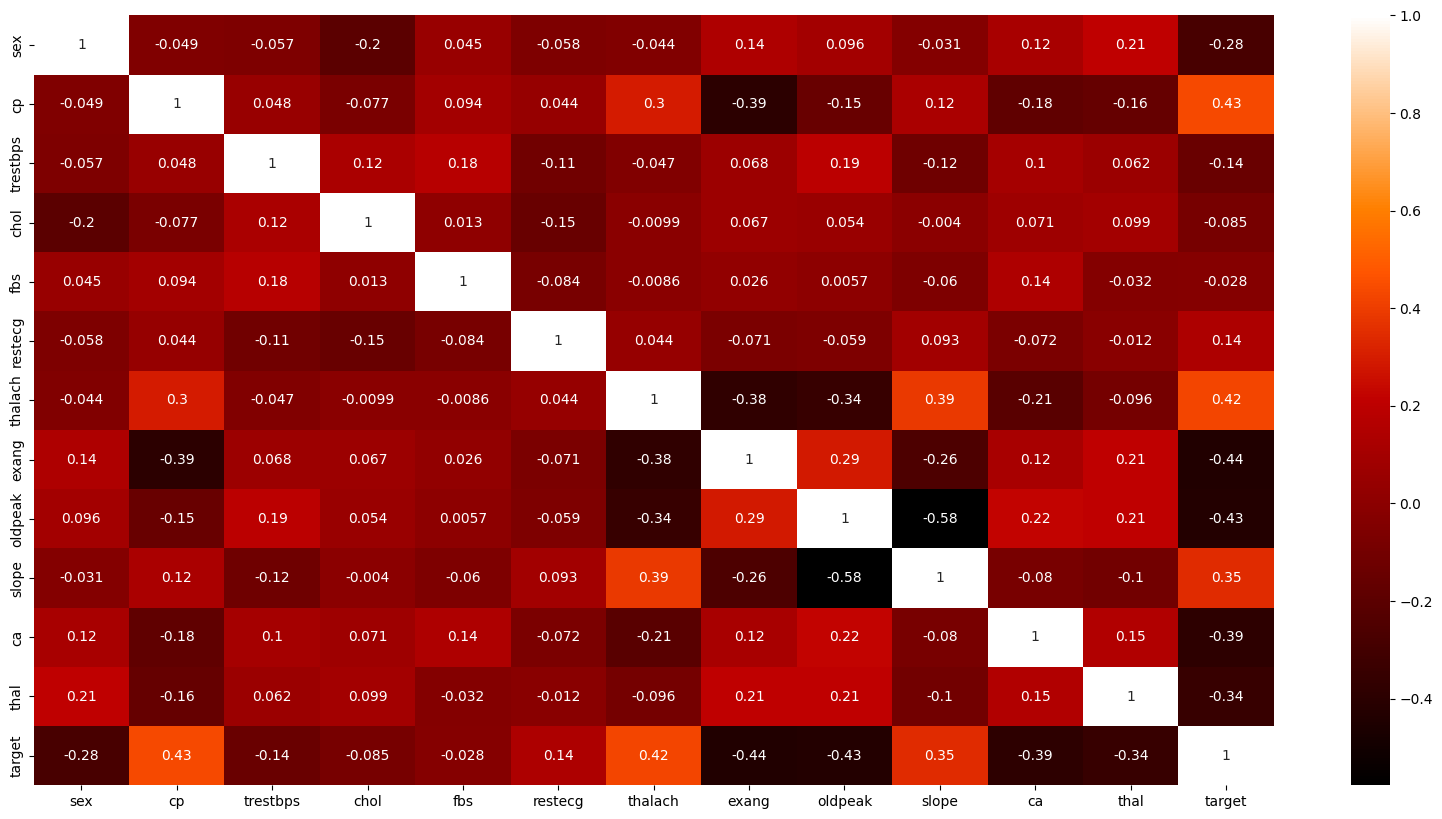

In [76]:
#heat map to show Correlation between Variables 
plt.figure(figsize=(20, 10))

sns.heatmap(data.corr() , annot=True , cmap="gist_heat" , linecolor="black")

In [77]:
#show if there are any null values 
data.isnull()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
#counting null value 
data.isnull().sum()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,False,False,False,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False,False,False,False
56,False,False,False,False,False,False,False,False,False,False,False,False,False
57,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,False,False,False,False,False,False,False,False,False,False,False,False,False
45,False,False,False,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,False,False,False


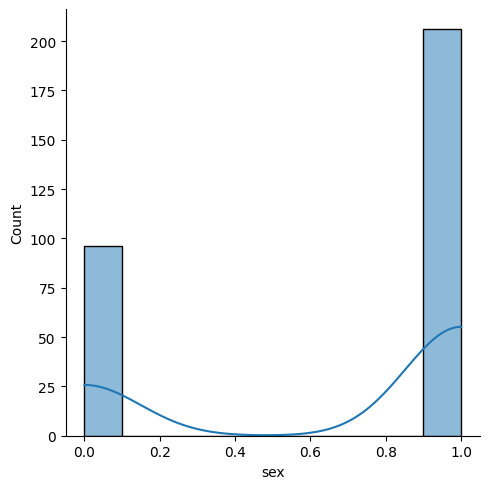

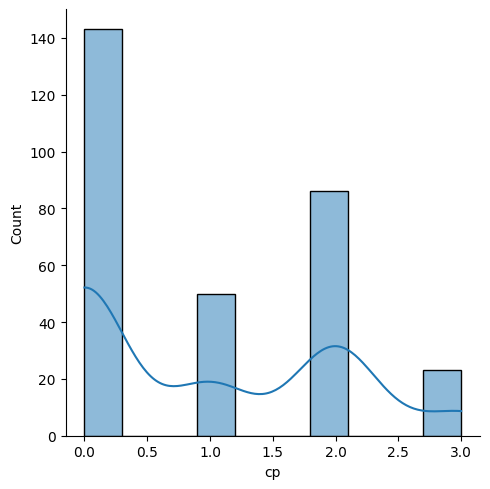

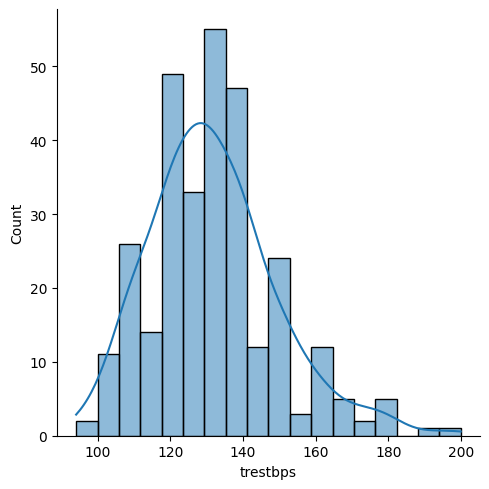

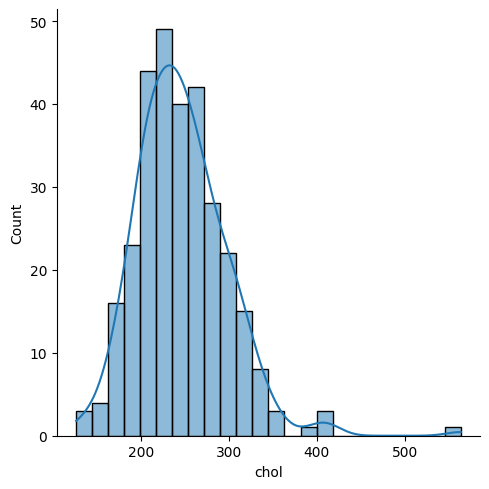

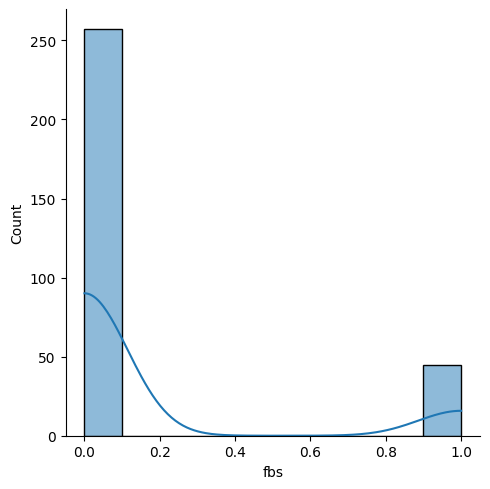

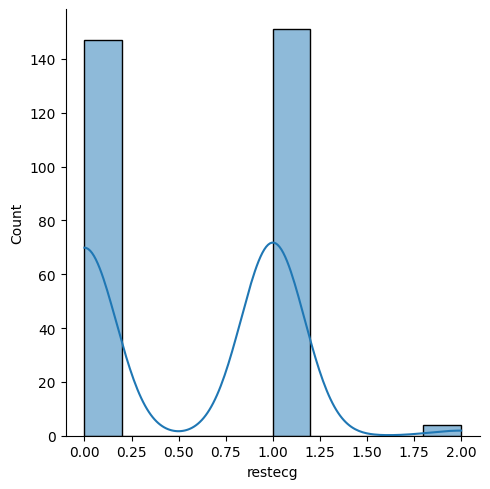

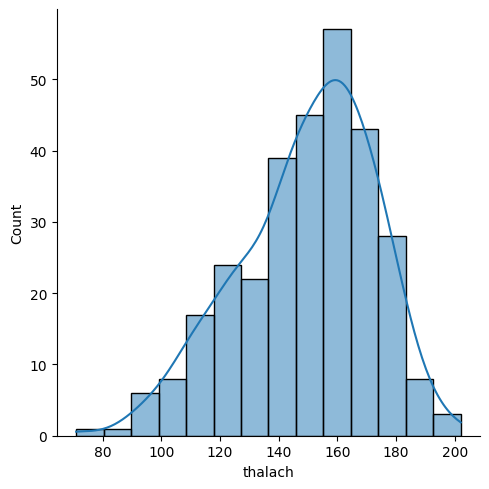

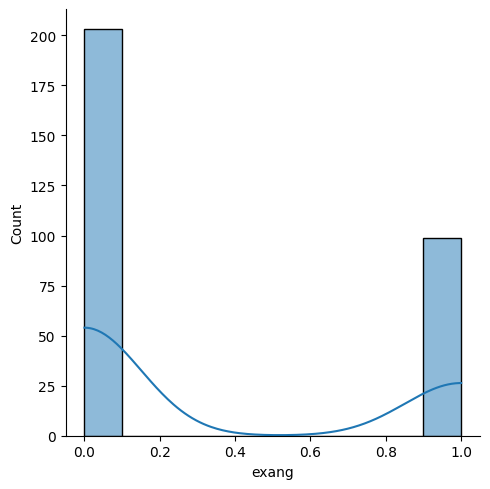

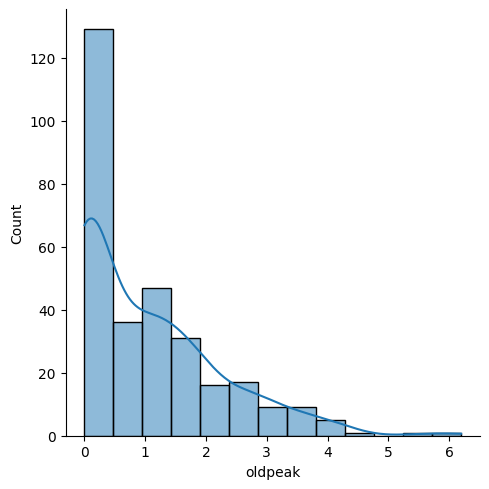

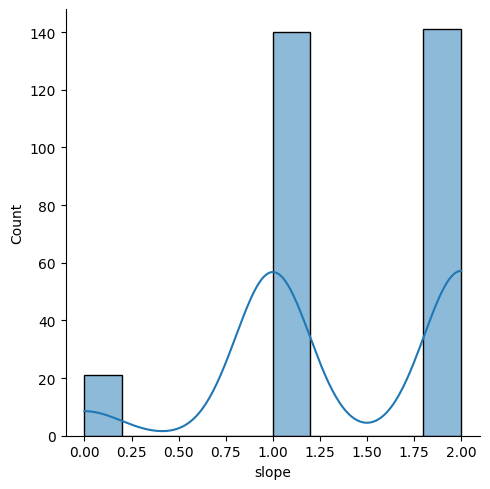

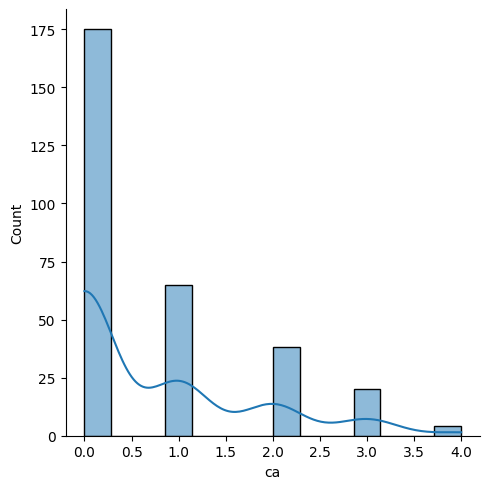

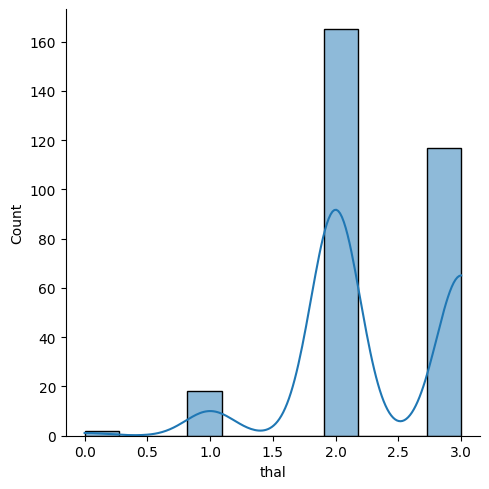

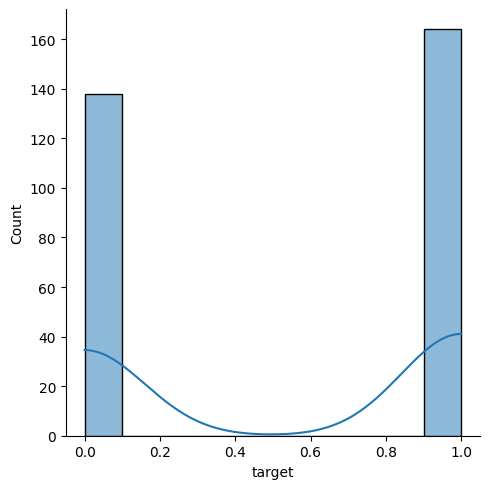

In [94]:
# Create distribution plot for each variable
for column in data.columns:
    sns.displot(data[column], kde=True)

In [79]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

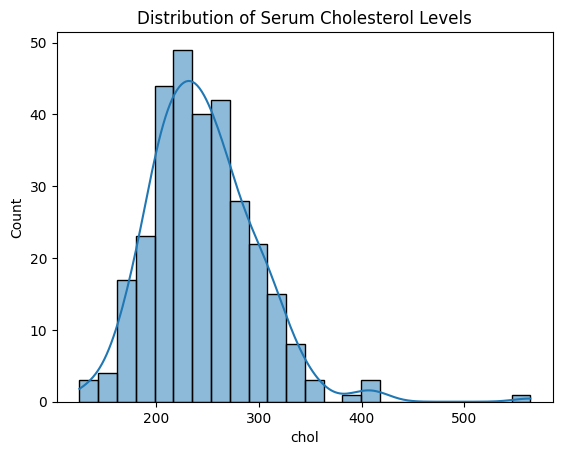

In [80]:
# display histogram chart 

# Select the column to display the histogram for
col = 'chol'

# Create a histogram of the column values
sns.histplot(data[col], kde=True)

# Add a title to the chart
plt.title('Distribution of Serum Cholesterol Levels')
 
# Show the chart
plt.show()

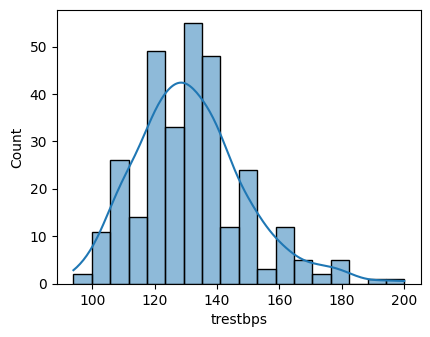

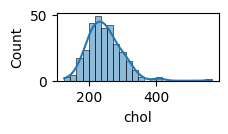

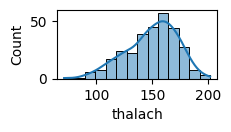

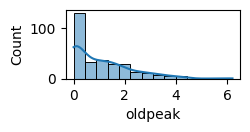

In [81]:
#tp display histogram chart for all variables

plt.figure(figsize=(12,13))
data_cat = data.drop(['sex' ,'exang','fbs','restecg', 'slope' , 'ca' , 'cp',  'target' , 'thal'] , axis=1)
for i , col  in enumerate(data_cat.columns ,1):
    plt.subplot(4,3 ,i)
    sns.histplot(data_cat[col], kde=True ) 
    plt.tight_layout()
    plt.show()

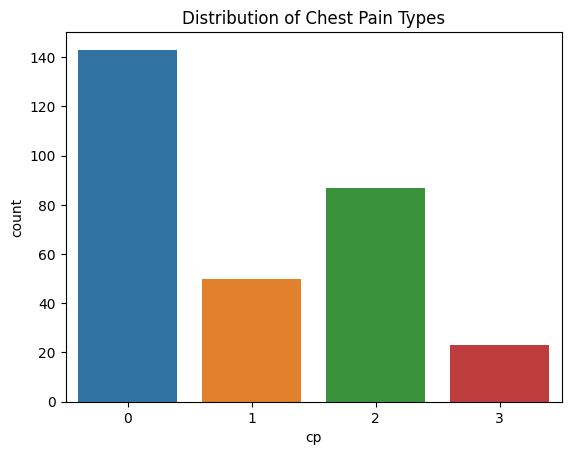

In [82]:
# display bar plot chart

# Select the column to display the bar plot for
col = 'cp'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of Chest Pain Types')

# Show the chart
plt.show()

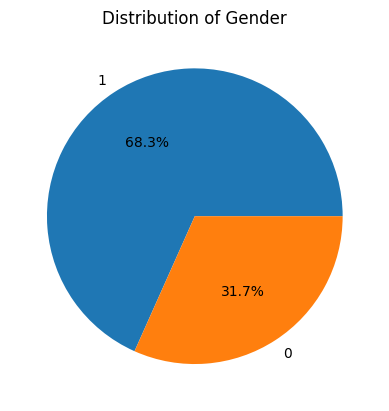

In [83]:
# display pie chart

# Select the column to display the bar pie chart for
col = 'sex'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar pie chart of the counts
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Gender')

# Show the chart
plt.show()


In [93]:
# Show the table of distribution for each variable
for column in data.columns:
    print(data[column].value_counts())

sex
1    206
0     96
Name: count, dtype: int64
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64
chol
204    6
197    6
234    6
212    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64
fbs
0    257
1     45
Name: count, dtype: int64
restecg
1    151
0    147
2      4
Name: count, dtype: int64
thalach
162    11
160     9
163     9
152     8
125     7
       ..
202     1
184     1
121     1
192     1
90

In [84]:
#The number of duplicated rows
print(data.duplicated().sum())

1


In [85]:
#the duplicate value 
duplicates = data[data.duplicated()]
print(duplicates)

     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
age                                                                          
38     1   2       138   175    0        1      173      0      0.0      2  \

     ca  thal  target  
age                    
38    4     2       1  


In [86]:
#remove the dublicate
data=data.drop_duplicates(keep="last")

In [87]:
#The number of duplicated now
print(data.duplicated().sum())

0


In [65]:
#the duplicate value after rwmove the duplicate 
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [30]:
Xall=data.iloc[:,0:-1]
yall=data.target

In [31]:
ft=FunctionTransformer(func=np.log1p)
skew=['oldpeak',"chol"]
data[skew]=ft.fit_transform(data[skew])

In [32]:
from sklearn.model_selection import train_test_split
X, Xt, y, yt = train_test_split(Xall, yall, test_size=0.2, random_state=0)
print("X_train shape: ",X.shape)
print("X_test shape: ",Xt.shape)
print()
print("Y_train shape: ",y.shape)
print("Y_test shape: ",yt.shape)

X_train shape:  (241, 12)
X_test shape:  (61, 12)

Y_train shape:  (241,)
Y_test shape:  (61,)


In [33]:
sc=StandardScaler()
m=MinMaxScaler()
x_train_scaled=sc.fit_transform(X)
x_test_scaled=sc.transform(Xt)

X = pd.DataFrame(x_train_scaled, columns = X.columns[:])
Xt = pd.DataFrame(x_test_scaled, columns = Xt.columns[:])
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.418626,0.985447,-0.559889,-0.632873,-0.405279,0.905036,0.658687,-0.698323,-0.731051,-0.614921,-0.706740,-0.498761
1,-1.418626,0.985447,0.816981,0.594254,-0.405279,-0.975254,0.108229,-0.698323,-0.898287,-0.614921,0.295168,-0.498761
2,0.704907,0.985447,0.472763,-0.670631,2.467435,-0.975254,0.658687,-0.698323,-0.898287,0.995904,-0.706740,-0.498761
3,-1.418626,-0.929817,-0.445150,-0.934935,-0.405279,0.905036,-0.569257,1.432003,-0.898287,-0.614921,-0.706740,-0.498761
4,0.704907,-0.929817,-1.248324,1.670349,-0.405279,0.905036,-0.272857,1.432003,1.610255,-0.614921,0.295168,1.147835
